In [1]:
import rdflib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from graph import *
from rdf2vec import RDF2VecTransformer
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
from LCS import new_lcs

In [2]:
print(end='Loading data... ', flush=True)
g = rdflib.Graph()
g.parse('data/new_limit_500k.nt', format="nt")
print('OK')

# Extract all database drugs' URI
all_drugs_file = pd.read_csv('data/all_drugs.tsv', sep='\t')
all_drugs = [rdflib.URIRef(x) for x in all_drugs_file['drug']]

# Define relevant predicates
# TODO: Wrong -> predicates excluded!!!
predicates = pd.read_csv('data/bad_predicates.tsv', sep='\t')
predicates = [rdflib.URIRef(x) for x in predicates['predicate']]


Loading data... OK


In [3]:
kg = rdflib_to_kg(g, label_predicates=predicates)

In [4]:
#kg = rdflib_to_kg(g, label_predicates=[rdflib.URIRef("http://bio2rdf.org/drugbank_vocabulary:calculated-properties"), rdflib.URIRef("http://purl.org/dc/terms/title")])

#a = extract_instance(kg, "http://bio2rdf.org/drugbank:DB00114")

In [5]:
# Extract graph
#kg = rdflib_to_kg(g, label_predicates=predicates)
i = 1
j = 1

kv = []
drugs = []
graphs = []
for drug in all_drugs:
    try:
        g = extract_instance(kg, drug)
        #print(drug)
        #g.visualise()
        graphs.append(g)
        drugs.append(drug)
        kv.append( {'graph': g, 'resource': drug} )
        i += 1
    except Exception as e:
        j += 1
        
        
print('ok:' + str(i))
print('failed:' + str(j))

ok:496
failed:7265


In [6]:
#for g in graphs:
#    g.visualise()

In [7]:
#g1 = graphs[4]
#g2 = graphs[5]
#n1 = "http://bio2rdf.org/drugbank:DB08418"
#n2 = "http://bio2rdf.org/drugbank:DB08419"
#x_Tx = new_lcs(n1, n2, g1, g2, 2)

In [8]:
#x_Tx.visualise()

In [8]:
# Embeddings
transformer = RDF2VecTransformer(_type='walk', walks_per_graph=500)
embeddings = transformer.fit_transform(graphs)

kmeans = KMeans(n_clusters=7)
k = kmeans.fit(embeddings)
y_kmeans = kmeans.predict(embeddings)


495it [00:01, 298.53it/s]


In [9]:
print(len(embeddings[0]))

500


In [10]:
k = 0
for y in y_kmeans:
    print(str(k) + ': ' + str(y))
    k += 1

0: 4
1: 4
2: 4
3: 2
4: 2
5: 4
6: 6
7: 3
8: 6
9: 5
10: 5
11: 3
12: 6
13: 2
14: 3
15: 6
16: 4
17: 2
18: 3
19: 2
20: 5
21: 1
22: 5
23: 1
24: 4
25: 6
26: 1
27: 5
28: 5
29: 5
30: 3
31: 6
32: 3
33: 2
34: 2
35: 4
36: 5
37: 2
38: 0
39: 5
40: 4
41: 2
42: 3
43: 4
44: 3
45: 3
46: 1
47: 5
48: 5
49: 6
50: 6
51: 2
52: 4
53: 5
54: 1
55: 1
56: 1
57: 1
58: 5
59: 3
60: 2
61: 6
62: 6
63: 2
64: 2
65: 2
66: 3
67: 2
68: 2
69: 2
70: 1
71: 6
72: 6
73: 6
74: 2
75: 2
76: 2
77: 6
78: 3
79: 6
80: 6
81: 6
82: 6
83: 2
84: 4
85: 3
86: 2
87: 6
88: 4
89: 2
90: 6
91: 1
92: 3
93: 4
94: 2
95: 2
96: 5
97: 2
98: 6
99: 2
100: 1
101: 5
102: 6
103: 5
104: 5
105: 2
106: 2
107: 2
108: 6
109: 5
110: 3
111: 2
112: 6
113: 5
114: 5
115: 5
116: 5
117: 5
118: 5
119: 5
120: 5
121: 5
122: 3
123: 2
124: 2
125: 3
126: 1
127: 4
128: 6
129: 4
130: 2
131: 6
132: 4
133: 1
134: 1
135: 5
136: 2
137: 5
138: 3
139: 5
140: 0
141: 4
142: 1
143: 6
144: 4
145: 5
146: 6
147: 6
148: 1
149: 5
150: 5
151: 1
152: 1
153: 5
154: 1
155: 4
156: 6
157: 1
158:

In [11]:
drug1 = drugs[6]
drug2 = drugs[8]

graph1 = graphs[6]
graph2 = graphs[8]

print(drug1)
#graph1.visualise()
print(drug2)
#graph2.visualise()


http://bio2rdf.org/drugbank:DB08420
http://bio2rdf.org/drugbank:DB08422


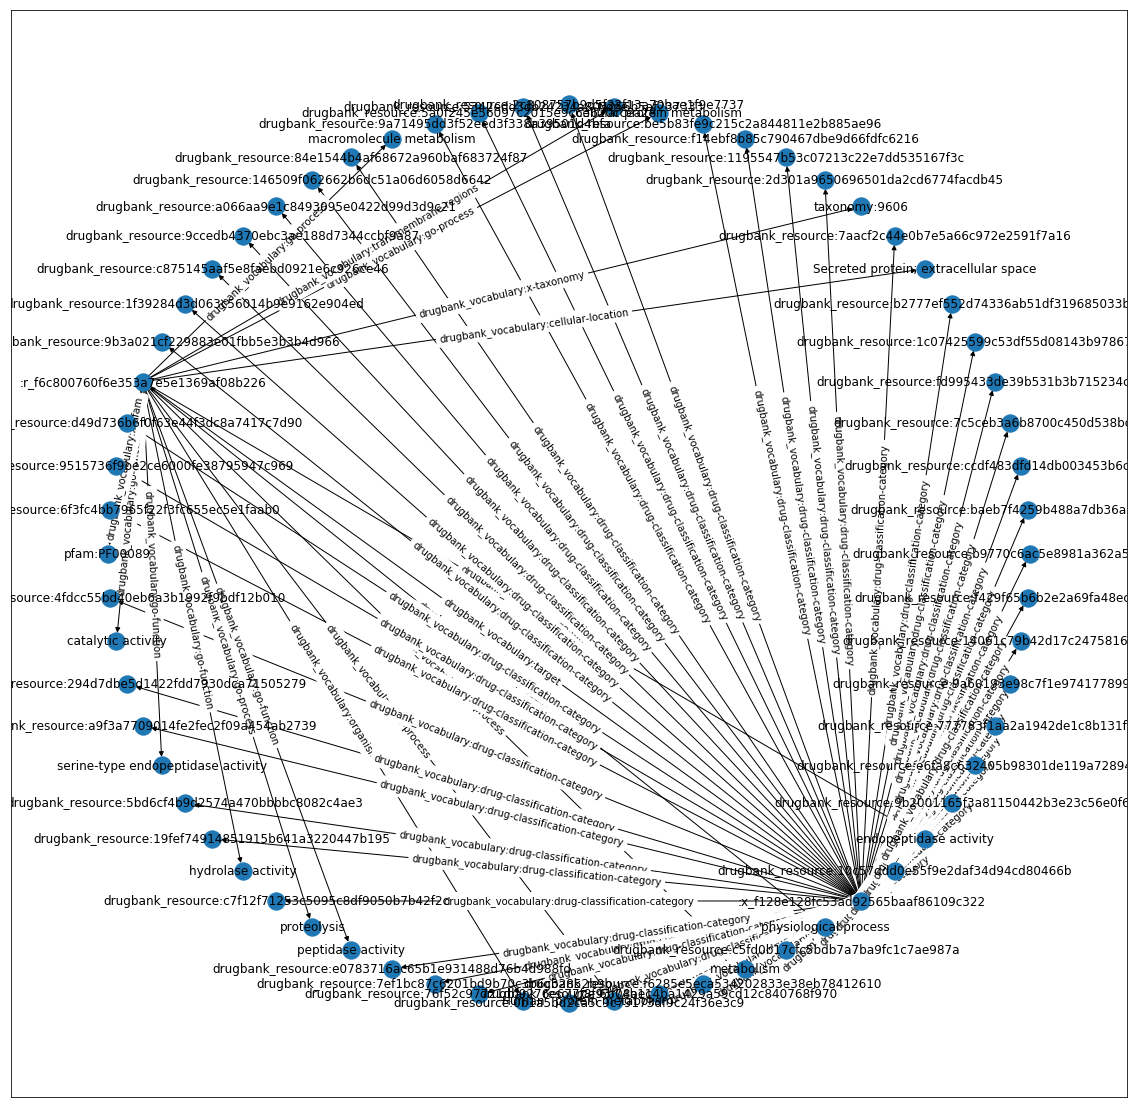

In [12]:
x_Tx = new_lcs(drug1, drug2, graph1, graph2, 2)
x_Tx.visualise()

In [ ]:
# PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(embeddings)

principalDf = pd.DataFrame(data=pca, columns=['pc1', 'pc2'])

In [ ]:
kmeans2 = KMeans(n_clusters=7)
kmeans2.fit(principalDf)

In [ ]:
print(kmeans2.cluster_centers_)

In [ ]:
# rappresentazione grafica
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=y_kmeans, s=50, cmap='viridis')

centers = np.asarray(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

In [ ]:
# PCA
pca = PCA(n_components=3)
pca = pca.fit_transform(embeddings)

principalDf = pd.DataFrame(data=pca, columns=['pc1', 'pc2', 'pc3'])

kmeans2 = KMeans(n_clusters=7)
kmeans2.fit(principalDf)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'], c=y_kmeans, s=50, cmap='viridis')

centers = np.asarray(kmeans2.cluster_centers_)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='black', s=200, alpha=0.5)